In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
#Importing the file
rev=pd.read_csv("stock_data.csv")
rev.info()
rev.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [113]:
df=rev.reset_index()['Close']
df

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [116]:
# Normalize the close
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [117]:
# Split the data into training and testing partition

training_size=int(len(rev1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [120]:
# convert into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Choose a suitable sequence length
time_step=100
X_train, y_train=create_dataset(train_data, time_step)
X_test, ytest=create_dataset(test_data, time_step)

In [104]:
# reshape 
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [105]:
rev1.reset_index(inplace=True)
rev1.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [48]:
from keras.models import Sequential
from keras.layers import LSTM,Dense
# Build a Stacked LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(units=50))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32)

# Make predictions
predictions_scaled = model.predict(X_test_seq)

# Inverse transform predictions to the original scale
predictions_original_scale = scaler.inverse_transform(predictions_scaled)

ModuleNotFoundError: No module named 'keras'

In [50]:
df=df.iloc

array([[<AxesSubplot: title={'center': 'index'}>,
        <AxesSubplot: title={'center': 'Open'}>,
        <AxesSubplot: title={'center': 'High'}>],
       [<AxesSubplot: title={'center': 'Low'}>,
        <AxesSubplot: title={'center': 'Last'}>,
        <AxesSubplot: title={'center': 'Close'}>],
       [<AxesSubplot: title={'center': 'Total Trade Quantity'}>,
        <AxesSubplot: title={'center': 'Turnover (Lacs)'}>,
        <AxesSubplot: >]], dtype=object)

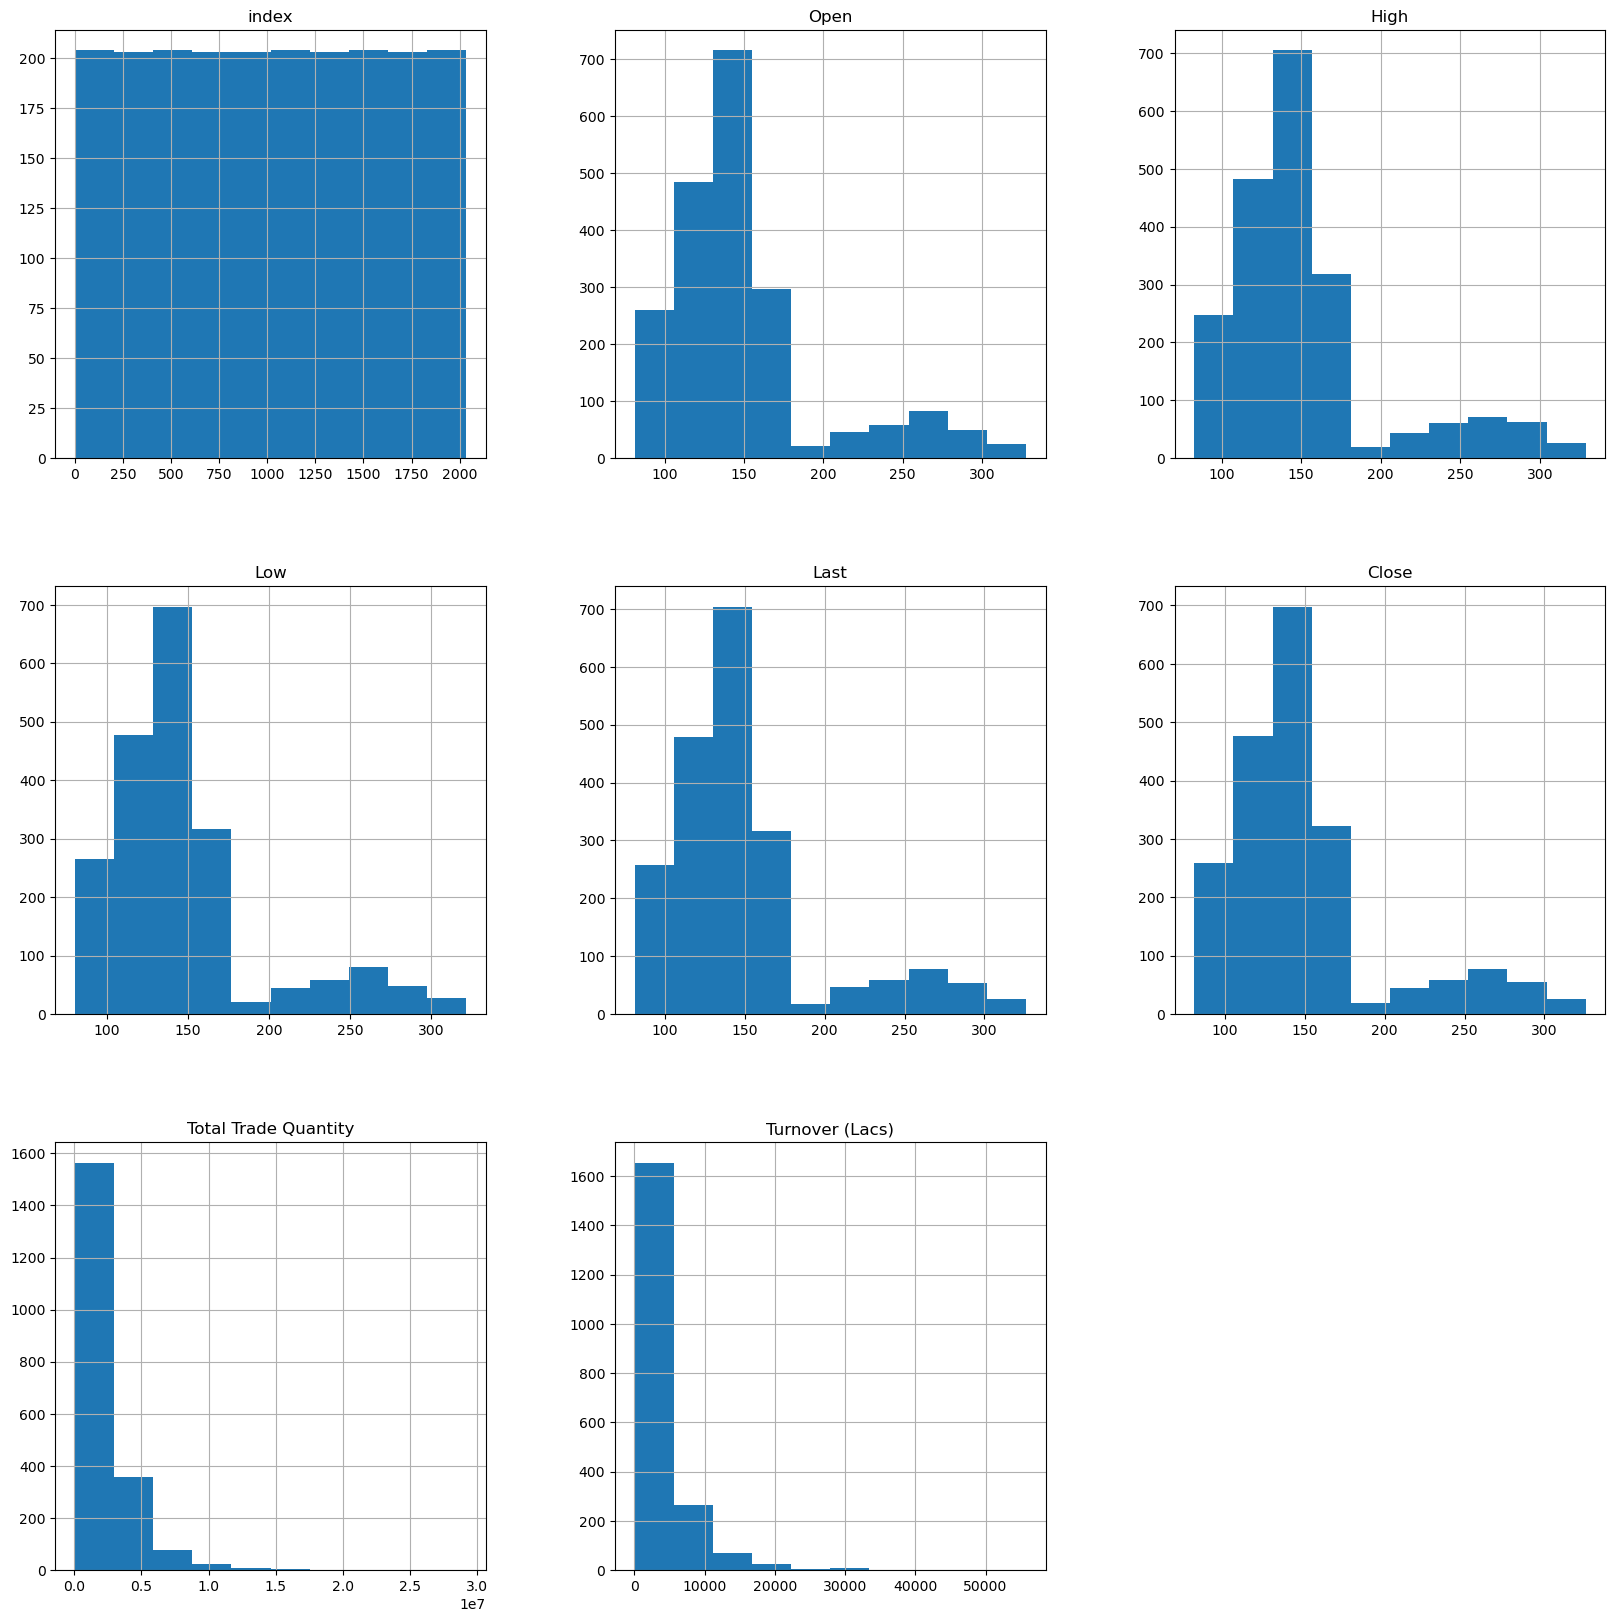

In [66]:
rev1.hist(figsize=(20,20))

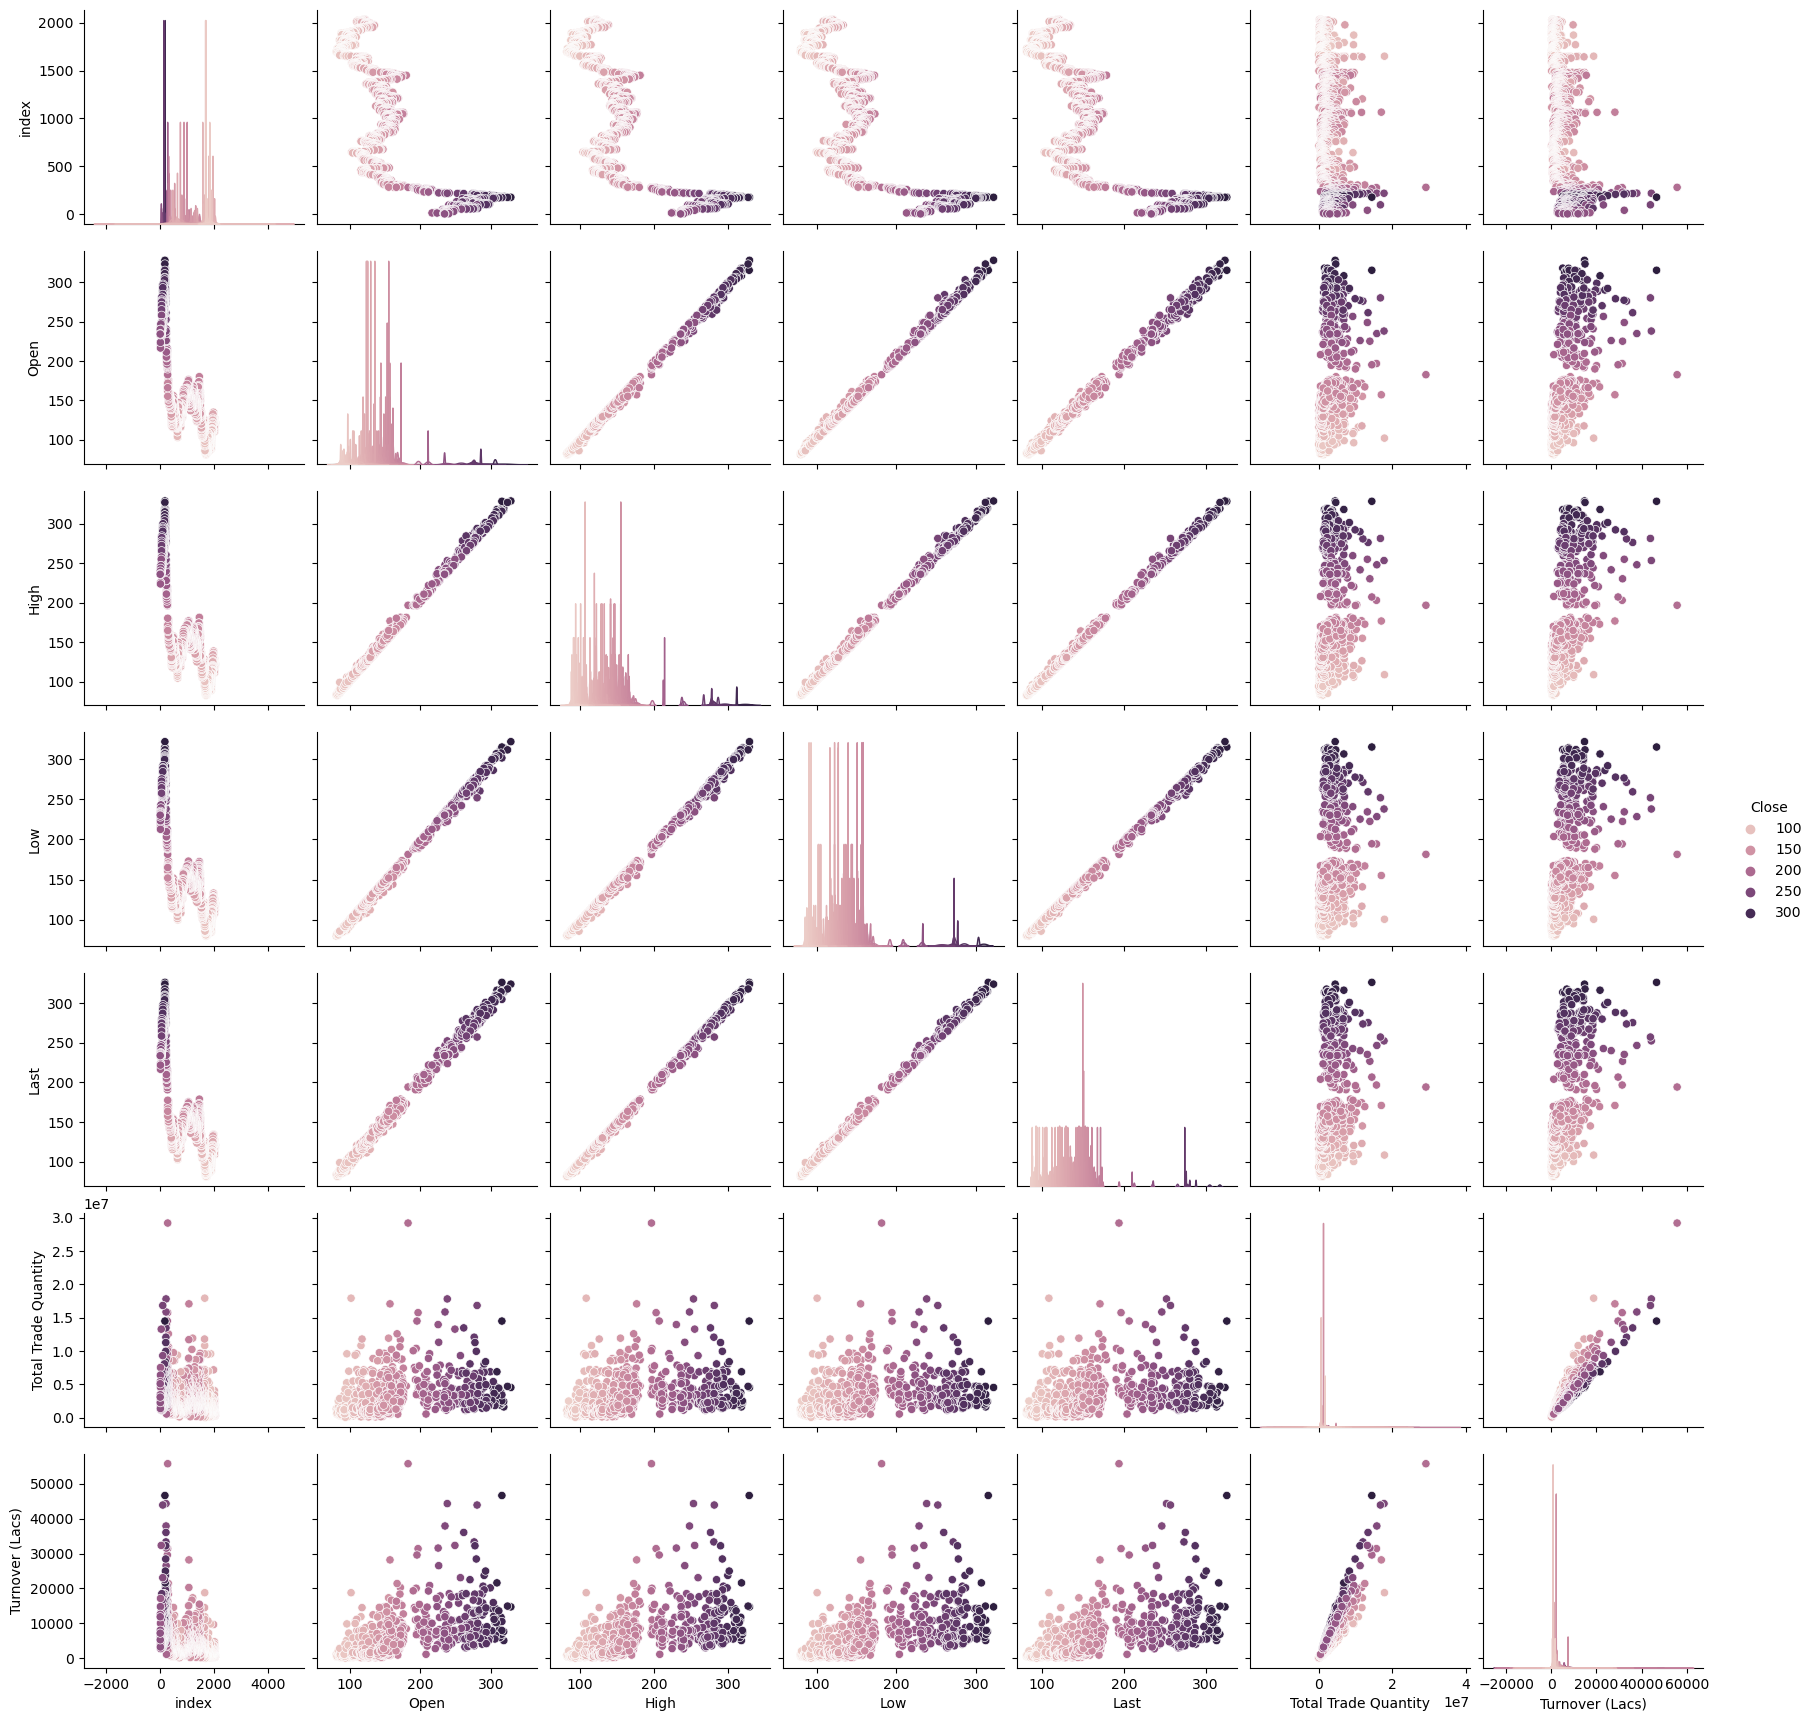

In [70]:
sns.pairplot(rev1,hue="Close")

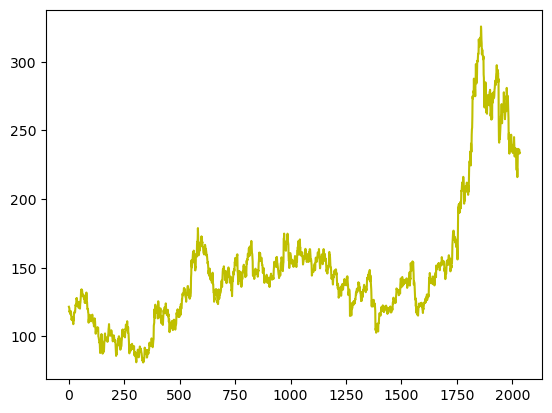

In [71]:
plt.plot(rev1['Close'],'y')